In [1]:
import os
# –û—Ç–∫–ª—é—á–∞–µ—Ç –≤—Å–µ –ª–æ–≥–∏ TensorFlow (0 - –≤—Å–µ, 1 - –ø—Ä–µ–¥—É–ø—Ä–µ–∂–¥–µ–Ω–∏—è, 2 - –æ—à–∏–±–∫–∏, 3 - –∫—Ä–∏—Ç–∏—á–Ω—ã–µ –æ—à–∏–±–∫–∏)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [97]:
from sklearn import datasets
import pandas as pd
import numpy as np
from typing import List, Union
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import time  
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error, confusion_matrix, accuracy_score, f1_score, r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
import xgboost as xgb

# –°–æ–∑–¥–∞–¥–∏–º –∫–ª–∞—Å—Å –¥–ª—è —Ä–∞–±—Ç—ã —Å –¥–∞–Ω–Ω—ã–º–∏

In [8]:
class Car:

    """
    –ö–ª–∞—Å—Å –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–æ–º.
    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    self.df  - –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
    –ú–µ—Ç–æ–¥—ã:
    unique_count(self) - –º–µ—Ç–æ–¥ –ø–æ—Å—á–µ—Ç–∞ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö
    correlation_number(self) - –º–µ—Ç–æ–¥ –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã –ø–æ —á–∏—Å–ª–æ–≤—ã–º —Å—Ç–æ–ª–±—Ü–∞–º.
    correlation_category(self) - –º–µ—Ç–æ–¥ –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–π–Ω—ã–º —Å—Ç–æ–ª–±—Ü–∞–º
    heatmap(self, first_col: str, second_col: str, main_col: str ) - –º–µ—Ç–æ–¥ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –≥—Ä–∞—Ñ–∏–∫–∞ –∫–æ—Ä—Ä. –º–∞—Ç—Ä–∏—Ü—ã
    my_graf(self, first_col, second_col, data_df=None) - –º–µ—Ç–æ–¥ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –≥—Ä–∞—Ñ–∏–∫–æ–≤
    remove_outliers_STD(self, numerical_columns) - –º–µ—Ç–æ–¥ –¥–ª—è —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ –≤—ã–±—Ä–æ—Å–æ–≤ (—Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ)
    remove_outliers_IQR(self, numerical_columns) - –º–µ—Ç–æ–¥ –¥–ª—è —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ –≤—ã–±—Ä–æ—Å–æ–≤ (–∫–≤–∞–Ω—Ç–∏–ª–∏)
    """
    def __init__(self, path):
        self.df = pd.read_csv(path)

    def summary_statistics(self, first_col: str, second_col: str, **kwargs) -> pd.DataFrame:
       
        """
        –ú–µ—Ç–æ–¥ –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –ø–æ second_col, —Å–≥—Ä—É–ø–ø–∏—Ä–æ–≤–∞–Ω–Ω—É—é –ø–æ first_col.
        –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
        first_col - –ø–µ—Ä–≤—ã–π —Å—Ç–æ–ª–±–µ—Ü (–∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∏)
        second_col - –≤—Ç–æ—Ä–æ–π —Å—Ç–æ–±–µ—Ü - –¥–ª—è –ø–æ—Å—á–µ—Ç–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏
        **kwargs - —Å–ª–æ–≤–∞—Ä–∏ –¥–ª—è —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ (–≤—ã–ø–æ–ª–Ω—è—é—Ç—Å—è –≤ –ø–µ—Ä–≤—É—é –æ—á–µ—Ä–µ–¥—å)
        –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
        pd.DataFrame - —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ —Å–≥—Ä—É–ø–ø–∏—Ä–æ–≤–∞–Ω–Ω—ã–º —Å—Ç–æ–ª–±—Ü–∞–º
        """
        
        df: pd.DataFrame = self.df  # –†–∞–±–æ—Ç–∞–µ–º —Å –∫–æ–ø–∏–µ–π DataFrame
        
        # –ü—Ä–∏–º–µ–Ω—è–µ–º –≤—Å–µ —Ñ–∏–ª—å—Ç—Ä—ã, –µ—Å–ª–∏ –æ–Ω–∏ –µ—Å—Ç—å
        for filter_col, filter_value in kwargs.items():
            if filter_col == 'Cabin':
                # –§–∏–ª—å—Ç—Ä—É–µ–º –ø–æ –ø–µ—Ä–≤–æ–π –±—É–∫–≤–µ –≤ –∑–Ω–∞—á–µ–Ω–∏–∏ —Å—Ç–æ–ª–±—Ü–∞ 'Cabin'
                df = df[df[filter_col].str[0] == filter_value]
            else:
                # –§–∏–ª—å—Ç—Ä—É–µ–º –ø–æ –æ–±—ã—á–Ω–æ–º—É –∑–Ω–∞—á–µ–Ω–∏—é
                df = df[df[filter_col] == filter_value]
        
        # –í–æ–∑–≤—Ä–∞—â–∞–µ–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –ø–æ –¥–∞–Ω–Ω—ã–º
        return df[[first_col, second_col]].groupby(first_col, observed=False).describe()

    def unique_count(self):
        
        """
        –ú–µ—Ç–æ–¥ –ø–æ—Å—á–µ—Ç–∞ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö –∏ –≤—ã–≤–æ–¥–∞ –∏—Ö —Å–ø–∏—Å–∫–æ–º (–µ—Å–ª–∏ –æ–Ω–∏ –Ω–µ —á–∏—Å–ª–∞)
        """
    
        for col in self.df.columns:
            unique_count: int = self.df[col].nunique()  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞
            unique_values: List[Union(int|str)] = self.df[col].unique().tolist()  # –°–ø–∏—Å–æ–∫ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞
            
            # –ü—Ä–æ–≤–µ—Ä—è–µ–º, –≤—Å–µ –ª–∏ –∑–Ω–∞—á–µ–Ω–∏—è –º–æ–∂–Ω–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å –≤ —á–∏—Å–ª–∞ (—á—Ç–æ–±—ã –æ—Ç—Å–µ—è—Ç—å —á–∏—Å–ª–æ–≤—ã–µ –ø–æ–ª—è)
            is_numeric: bool = pd.to_numeric(self.df[col], errors='coerce').notnull().all()
            
            if is_numeric:
                print(f"–°—Ç–æ–ª–±–µ—Ü '{col}': —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π {unique_count} ‚Äî —Ü–∏—Ñ—Ä–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è")
            else:
                print(f"–°—Ç–æ–ª–±–µ—Ü '{col}': —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π {unique_count} ‚Äî {unique_values[:5]}")

    def correlation_number(self) -> pd.DataFrame:
        
        """
        –ú–µ—Ç–æ–¥ –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã –ø–æ —á–∏—Å–ª–æ–≤—ã–º —Å—Ç–æ–ª–±—Ü–∞–º.
        –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
        correlation_matrix - –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É
        """
        
        columns_list: List[Union(int|float)]  = self.df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        correlation_matrix: pd.DataFrame = self.df[columns_list].corr()
        return correlation_matrix

    def correlation_category(self, *args) -> pd.DataFrame:
        
        """
        –ú–µ—Ç–æ–¥ –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–π–Ω—ã–º —Å—Ç–æ–ª–±—Ü–∞–º.
        –ü–∞—Ä–∞–º–µ—Ç—Ä—ã
        *args - –Ω–∞–∑–≤–∞–Ω–∏—è —á–∏—Å–ª–æ–≤—ã—Ö —Å—Ç–æ–ª–±–æ–≤ –¥–ª—è –¥–æ–±–∞–≤–ª–µ–Ω–∏—è –∫ —ç—Ç–æ–π –º–∞—Ç—Ä–∏—Ü–µ
        –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
        correlation_matrix - –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É
        """
        
        # –ü–æ–ª—É—á–∞–µ–º –≤—Å–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã
        categorical_columns: List[str] = self.df.select_dtypes(include=['object', 'category']).columns.tolist()

        # –°–æ–∑–¥–∞—ë–º –∫–æ–ø–∏—é –¥–∞–Ω–Ω—ã—Ö, —á—Ç–æ–±—ã –Ω–µ –∏–∑–º–µ–Ω—è—Ç—å –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–π DataFrame
        df_encoded: pd.DataFrame = self.df.copy()

        # –ö–æ–¥–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –≤ —á–∏—Å–ª–æ–≤—ã–µ
        label_encoder = LabelEncoder()
        for col in categorical_columns:
            df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

        for item in args:
            categorical_columns.append(item)
    

        # –í—ã—á–∏—Å–ª—è–µ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é –ø–æ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω—ã–º –¥–∞–Ω–Ω—ã–º
        correlation_matrix: pd.DataFrame = df_encoded[categorical_columns].corr()

        return correlation_matrix

    def heatmap(self, first_col: str = None, second_col: str = None, main_col: str = None, correlation: bool = False, pivot: bool = False, categorical: bool = False):
        """
        –£–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω—ã–π –º–µ—Ç–æ–¥ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –≥—Ä–∞—Ñ–∏–∫–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã.
    
        –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
        - first_col: str - —Å—Ç–æ–ª–±–µ—Ü –¥–ª—è –æ—Å–∏ X (–æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ, –µ—Å–ª–∏ correlation=False –∏ pivot=False)
        - second_col: str - —Å—Ç–æ–ª–±–µ—Ü –¥–ª—è –æ—Å–∏ Y (–æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ, –µ—Å–ª–∏ correlation=False –∏ pivot=False)
        - main_col: str - —Å—Ç–æ–ª–±–µ—Ü, –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã–π –¥–ª—è –æ–∫—Ä–∞—Å–∫–∏ (–æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ, –µ—Å–ª–∏ correlation=False –∏ pivot=False)
        - correlation: bool - —Ñ–ª–∞–≥, –µ—Å–ª–∏ True, —Å—Ç—Ä–æ–∏—Ç—Å—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞.
        - pivot: bool - —Ñ–ª–∞–≥, –µ—Å–ª–∏ True, –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è `pivot_table` (first_col = index, second_col = columns).
        - categorical: bool - —Ñ–ª–∞–≥, –µ—Å–ª–∏ True, –≤—ã—á–∏—Å–ª—è–µ—Ç—Å—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.
        
        """
        plt.figure(figsize=(10, 6))
    
        if correlation:
            if categorical:
                # –ö–æ–¥–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ —á–∏—Å–ª–æ–≤—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
                df_encoded = self.df.copy()
                for col in df_encoded.select_dtypes(include=['object']).columns:
                    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))
                heatmap_data = df_encoded.corr()
                title = "–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ (–∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏)"
            else:
                # –û–±—ã—á–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
                heatmap_data = self.df.corr(numeric_only=True)
                title = "–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞ (—á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏)"
        elif pivot:
            if not first_col or not second_col or not main_col:
                raise ValueError("–î–ª—è pivot-—Ç–∞–±–ª–∏—Ü—ã –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —É–∫–∞–∑–∞—Ç—å first_col, second_col –∏ main_col")
            heatmap_data = self.df.pivot_table(index=first_col, columns=second_col, values=main_col, aggfunc='mean')
            title = f'–¢–µ–ø–ª–æ–≤–∞—è –∫–∞—Ä—Ç–∞ –ø–æ {first_col} –∏ {second_col}'
        else:
            if not first_col or not second_col or not main_col:
                raise ValueError("–ù–µ–æ–±—Ö–æ–¥–∏–º–æ —É–∫–∞–∑–∞—Ç—å first_col, second_col –∏ main_col –¥–ª—è –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∏")
            heatmap_data = self.df.groupby([first_col, second_col])[main_col].mean().unstack(fill_value=0)
            title = f'–¢–µ–ø–ª–æ–≤–∞—è –∫–∞—Ä—Ç–∞ –¥–ª—è {first_col} –∏ {second_col}'
    
        sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': '–ó–Ω–∞—á–µ–Ω–∏–µ'})
        plt.title(title)
        plt.xlabel(second_col if second_col else "")
        plt.ylabel(first_col if first_col else "")
    
        plt.show()


    def remove_outliers_STD(self, numerical_columns: List)-> pd.DataFrame:

        """
        –ú–µ—Ç–æ–¥ —É–¥–∞–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–≥–æ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è.
    
        –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
        - numerical_columns: List - —Å–ø–∏—Å–æ–∫ —Å—Ç–æ–ª–±—Ü–æ–≤ –¥–ª—è —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏
        –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
        df - > pd.DataFrame - –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
        """

        df: pd.DataFrame = self.df.copy()
        
        for col in numerical_columns:
            mean = df[col].mean()  # –≤—ã—á–∏—Å–ª—è–µ–º —Å—Ä–µ–¥–Ω–µ–µ
            std = df[col].std()  # –≤—ã—á–∏—Å–ª—è–µ–º —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ
            threshold_upper = mean + 3 * std  # –≤–µ—Ä—Ö–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞
            threshold_lower = mean - 3 * std  # –Ω–∏–∂–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞
            df = df[(self.df[col] >= threshold_lower) & (df[col] <= threshold_upper)]  # —É–¥–∞–ª—è–µ–º –≤—ã–±—Ä–æ—Å—ã
        return df


    def remove_outliers_IQR(self, numerical_columns: List)-> pd.DataFrame:

        """
        –ú–µ—Ç–æ–¥ —É–¥–∞–ª–µ–Ω–∏—è –≤—ã–±—Ä–æ—Å–æ–≤ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º IQR
    
        –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
        - numerical_columns: List - —Å–ø–∏—Å–æ–∫ —Å—Ç–æ–ª–±—Ü–æ–≤ –¥–ª—è —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏
        –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
        df - > pd.DataFrame - –¥–∞—Ç–∞—Ñ—Ä–µ–π–º
        """

        df: pd.DataFrame = self.df.copy()
        
        for col in numerical_columns:
            Q1 = df[col].quantile(0.25)  # –ø–µ—Ä–≤—ã–π –∫–≤–∞—Ä—Ç–∏–ª—å
            Q3 = df[col].quantile(0.75)  # —Ç—Ä–µ—Ç–∏–π –∫–≤–∞—Ä—Ç–∏–ª—å
            IQR = Q3 - Q1  # –º–µ–∂–∫–≤–∞—Ä—Ç–∏–ª—å–Ω—ã–π —Ä–∞–∑–º–∞—Ö
            lower_bound = Q1 - 1.5 * IQR  # –Ω–∏–∂–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞ –¥–ª—è –≤—ã–±—Ä–æ—Å–æ–≤
            upper_bound = Q3 + 1.5 * IQR  # –≤–µ—Ä—Ö–Ω—è—è –≥—Ä–∞–Ω–∏—Ü–∞ –¥–ª—è –≤—ã–±—Ä–æ—Å–æ–≤
            df = df[(self.df[col] >= lower_bound) & (df[col] <= upper_bound)]  # —É–¥–∞–ª—è–µ–º –≤—ã–±—Ä–æ—Å—ã
        return df

# –ó–∞–≥—Ä—É–∑–∏–º –∏ –ø—Ä–æ–≤–µ—Ä–∏–º –¥–∞–Ω–Ω—ã–µ

In [9]:
car = Car('content/CarPrice_Assignment.csv')

In [10]:
car.df

car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88.6  ...   
1          two  convertible        rwd          front       88.6  ...   
2          two    hatchback        rwd          front       94.5  ...   
3         four        sedan        fwd          front       99.8  ...   
4         four        sedan        4wd          front       99.4  ...   
..         ...          ...        ...            ...        ...  ...   
200       four        sedan        rwd          front      109.1  ...   
201       four        sedan        rwd          front      109.1  ...   
202       four        sedan        rwd          front      109.1  ...   
203       four        sedan        rwd          front      109.1  ...   
204       four        sedan        rwd          front      109.1  ...   

     enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0           130        mpfi       3.47    2.68              9.0        111   
1           130        mpfi       3.47    2.68              9.0        111   
2           152        mpfi       2.68    3.47              9.0        154   
3           109        mpfi       3.19    3.40             10.0        102   
4           136        mpfi       3.19    3.40              8.0        115   
..          ...         ...        ...     ...              ...        ...   
200         141        mpfi       3.78    3.15              9.5        114   
201         141        mpfi       3.78    3.15              8.7        160   
202         173        mpfi       3.58    2.87              8.8        134   
203         145         idi       3.01    3.40             23.0        106   
204         141        mpfi       3.78    3.15              9.5        114   

     peakrpm citympg  highwaympg    price  
0       5000      21          27  13495.0  
1       5000      21          27  16500.0  
2       5000      19          26  16500.0  
3       5500      24          30  13950.0  
4       5500      18          22  17450.0  
..       ...     ...         ...      ...  
200     5400      23          28  16845.0  
201     5300      19          25  19045.0  
202     5500      18          23  21485.0  
203     4800      26          27  22470.0  
204     5400      19          25  22625.0  

[205 rows x 26 columns]

In [11]:
car.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [13]:
car.unique_count()

–°—Ç–æ–ª–±–µ—Ü 'car_ID': —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π 205 ‚Äî —Ü–∏—Ñ—Ä–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
–°—Ç–æ–ª–±–µ—Ü 'symboling': —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π 6 ‚Äî —Ü–∏—Ñ—Ä–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
–°—Ç–æ–ª–±–µ—Ü 'CarName': —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π 147 ‚Äî ['alfa-romero giulia', 'alfa-romero stelvio', 'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls']
–°—Ç–æ–ª–±–µ—Ü 'fueltype': —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π 2 ‚Äî ['gas', 'diesel']
–°—Ç–æ–ª–±–µ—Ü 'aspiration': —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π 2 ‚Äî ['std', 'turbo']
–°—Ç–æ–ª–±–µ—Ü 'doornumber': —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π 2 ‚Äî ['two', 'four']
–°—Ç–æ–ª–±–µ—Ü 'carbody': —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π 5 ‚Äî ['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']
–°—Ç–æ–ª–±–µ—Ü 'drivewheel': —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π 3 ‚Äî ['rwd', 'fwd', '4wd']
–°—Ç–æ–ª–±–µ—Ü 'enginelocation': —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π 2 ‚Äî ['front', 'rear']
–°—Ç–æ–ª–±–µ—Ü 'wheelbase': 

## –û–ø–∏—Å–∞–Ω–∏–µ —Ñ–∏—á–µ–π

In [ ]:
1	Car_ID				–£–Ω–∏–∫–∞–ª—å–Ω—ã–π –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –∫–∞–∂–¥–æ–≥–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è (—Ü–µ–ª–æ–µ —á–∏—Å–ª–æ)
2	Symboling 			–†–µ–π—Ç–∏–Ω–≥ —Å—Ç—Ä–∞—Ö–æ–≤–æ–≥–æ —Ä–∏—Å–∫–∞. +3 —É–∫–∞–∑—ã–≤–∞–µ—Ç —è–≤–ª—è–µ—Ç—Å—è —Ä–∏—Å–∫–æ–≤–∞–Ω–Ω—ã–º, -3 ‚Äî –¥–æ–≤–æ–ª—å–Ω–æ –±–µ–∑–æ–ø–∞—Å–µ–Ω. (–ö–∞—Ç–µ–≥–æ—Ä–∏–π–Ω–æ–µ)
3	carCompany			–ù–∞–∑–≤–∞–Ω–∏–µ –∫–æ–º–ø–∞–Ω–∏–∏-–ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—è –∞–≤—Ç–æ–º–æ–±–∏–ª—è (–ö–∞—Ç–µ–≥–æ—Ä–∏–π–Ω–æ–µ)
4	fueltype			–¢–∏–ø —Ç–æ–ø–ª–∏–≤–∞ –∞–≤—Ç–æ–º–æ–±–∏–ª—è, –Ω–∞–ø—Ä–∏–º–µ—Ä, –≥–∞–∑ –∏–ª–∏ –¥–∏–∑–µ–ª—å (–ö–∞—Ç–µ–≥–æ—Ä–∏–π–Ω–æ–µ)
5	aspiration			–¢–∏–ø –Ω–∞–¥–¥—É–≤–∞, –∏—Å–ø–æ–ª—å–∑—É–µ–º—ã–π –≤ –∞–≤—Ç–æ–º–æ–±–∏–ª–µ (–ö–∞—Ç–µ–≥–æ—Ä–∏–π–Ω–æ–µ)
6	doornumber			–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–≤–µ—Ä–µ–π –≤ –∞–≤—Ç–æ–º–æ–±–∏–ª–µ (–ö–∞—Ç–µ–≥–æ—Ä–∏–π–Ω–æ–µ)
7	carbody				–ö—É–∑–æ–≤ –∞–≤—Ç–æ–º–æ–±–∏–ª—è (–ö–∞—Ç–µ–≥–æ—Ä–∏–π–Ω–æ–µ))
8	drivewheel			–¢–∏–ø –≤–µ–¥—É—â–µ–≥–æ –∫–æ–ª–µ—Å–∞ (–ö–∞—Ç–µ–≥–æ—Ä–∏–π–Ω–æ–µ)
9	enginelocation		–†–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–µ –¥–≤–∏–≥–∞—Ç–µ–ª—è –∞–≤—Ç–æ–º–æ–±–∏–ª—è (–ö–∞—Ç–µ–≥–æ—Ä–∏–π–Ω–æ–µ)
10	wheelbase			–ö–æ–ª–µ—Å–Ω–∞—è –±–∞–∑–∞ –∞–≤—Ç–æ–º–æ–±–∏–ª—è (–ß–∏—Å–ª–æ–≤–æ–µ)
11	carlength			–î–ª–∏–Ω–∞ –∞–≤—Ç–æ–º–æ–±–∏–ª—è (–ß–∏—Å–ª–æ–≤–æ–µ)
12	carwidth			–®–∏—Ä–∏–Ω–∞ –∞–≤—Ç–æ–º–æ–±–∏–ª—è (–ß–∏—Å–ª–æ–≤–æ–µ)
13	carheight			–í—ã—Å–æ—Ç–∞ –∞–≤—Ç–æ–º–æ–±–∏–ª—è (–ß–∏—Å–ª–æ–≤–æ–µ)
14	curbweight			–í–µ—Å –∞–≤—Ç–æ–º–æ–±–∏–ª—è –±–µ–∑ –ø–∞—Å—Å–∞–∂–∏—Ä–æ–≤ –∏ –±–∞–≥–∞–∂–∞. (–ß–∏—Å–ª–æ–≤–æ–π)
15	enginetype			–¢–∏–ø –¥–≤–∏–≥–∞—Ç–µ–ª—è. (–ö–∞—Ç–µ–≥–æ—Ä–∏–π–Ω—ã–π)
16	cylindernumber		–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ü–∏–ª–∏–Ω–¥—Ä–æ–≤ –∞–≤—Ç–æ–º–æ–±–∏–ª—è (–ö–∞—Ç–µ–≥–æ—Ä–∏–π–Ω—ã–π)
17	enginesize			–†–∞–∑–º–µ—Ä –∞–≤—Ç–æ–º–æ–±–∏–ª—è (–ß–∏—Å–ª–æ–≤–æ–π)
18	fuelsystem			–¢–æ–ø–ª–∏–≤–Ω–∞—è —Å–∏—Å—Ç–µ–º–∞ –∞–≤—Ç–æ–º–æ–±–∏–ª—è (–ö–∞—Ç–µ–≥–æ—Ä–∏–π–Ω—ã–π)
19	boreratio			–ë–æ—Ä–µ—Ä–∞—Ü–∏—è –∞–≤—Ç–æ–º–æ–±–∏–ª—è (–ß–∏—Å–ª–æ–≤–æ–π)
20	stroke				–æ–±—ä–µ–º –¥–≤–∏–≥–∞—Ç–µ–ª—è (–ß–∏—Å–ª–æ–≤–æ–π)
21	compressionratio	—Å—Ç–µ–ø–µ–Ω—å —Å–∂–∞—Ç–∏—è –∞–≤—Ç–æ–º–æ–±–∏–ª—è (–ß–∏—Å–ª–æ–≤–æ–π)
22	horsepower			–õ–æ—à–∞–¥–∏–Ω—ã–µ —Å–∏–ª—ã (–ß–∏—Å–ª–æ–≤–æ–π)
23	peakrpm				–ø–∏–∫–æ–≤—ã–µ –æ–±–æ—Ä–æ—Ç—ã (–ß–∏—Å–ª–æ–≤–æ–π)
24	citympg				–ü—Ä–æ–±–µ–≥ –ø–æ –≥–æ—Ä–æ–¥—É (–ß–∏—Å–ª–æ–≤–æ–π)
25	highwaympg			–ü—Ä–æ–±–µ–≥ –ø–æ —à–æ—Å—Å–µ (–ß–∏—Å–ª–æ–≤–æ–π)
26	price(Dependent variable)	–¶–µ–Ω–∞ –∞–≤—Ç–æ–º–æ–±–∏–ª—è (–ß–∏—Å–ª–æ–≤–æ–π)

In [ ]:
# –°—Ç—Ä–æ–∏–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É

In [14]:
car.correlation_number()

car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm          -0.203789   0.273606  -0.360469  -0.287242 -0.220012   
citympg           0.015940  -0.035823  -0.470414  -0.670909 -0.642704   
highwaympg        0.011255   0.034606  -0.544082  -0.704662 -0.677218   
price            -0.109093  -0.079978   0.577816   0.682920  0.759325   

                  carheight  curbweight  enginesize  boreratio    stroke  \
car_ID             0.255960    0.071962   -0.033930   0.260064 -0.160824   
symboling         -0.541038   -0.227691   -0.105790  -0.130051 -0.008735   
wheelbase          0.589435    0.776386    0.569329   0.488750  0.160959   
carlength          0.491029    0.877728    0.683360   0.606454  0.129533   
carwidth           0.279210    0.867032    0.735433   0.559150  0.182942   
carheight          1.000000    0.295572    0.067149   0.171071 -0.055307   
curbweight         0.295572    1.000000    0.850594   0.648480  0.168790   
enginesize         0.067149    0.850594    1.000000   0.583774  0.203129   
boreratio          0.171071    0.648480    0.583774   1.000000 -0.055909   
stroke            -0.055307    0.168790    0.203129  -0.055909  1.000000   
compressionratio   0.261214    0.151362    0.028971   0.005197  0.186110   
horsepower        -0.108802    0.750739    0.809769   0.573677  0.080940   
peakrpm           -0.320411   -0.266243   -0.244660  -0.254976 -0.067964   
citympg           -0.048640   -0.757414   -0.653658  -0.584532 -0.042145   
highwaympg        -0.107358   -0.797465   -0.677470  -0.587012 -0.043931   
price              0.119336    0.835305    0.874145   0.553173  0.079443   

                  compressionratio  horsepower   peakrpm   citympg  \
car_ID                    0.150276   -0.015006 -0.203789  0.015940   
symboling                -0.178515    0.070873  0.273606 -0.035823   
wheelbase                 0.249786    0.353294 -0.360469 -0.470414   
carlength                 0.158414    0.552623 -0.287242 -0.670909   
carwidth                  0.181129    0.640732 -0.220012 -0.642704   
carheight                 0.261214   -0.108802 -0.320411 -0.048640   
curbweight                0.151362    0.750739 -0.266243 -0.757414   
enginesize                0.028971    0.809769 -0.244660 -0.653658   
boreratio                 0.005197    0.573677 -0.254976 -0.584532   
stroke                    0.186110    0.080940 -0.067964 -0.042145   
compressionratio          1.000000   -0.204326 -0.435741  0.324701   
horsepower               -0.204326    1.000000  0.131073 -0.801456   
peakrpm                  -0.435741    0.131073  1.000000 -0.113544   
citympg                   0.324701   -0.801456 -0.113544  1.000000   
highwaympg                0.265201   -0.770544 -0.054275  0.971337   
price                     0.067984    0.808139 -0.085267 -0.685751   

                  highwaympg     price  
car_ID              0.011255 -0.109093  
symboling           0.034606 -0.079978  
wheelbase          -0.544082  0.577816  
carlength          -0.704662  0.682920  
carwidth           -0.677218  0.759325  
carheight          -0.107358  0.119336  
curbwei

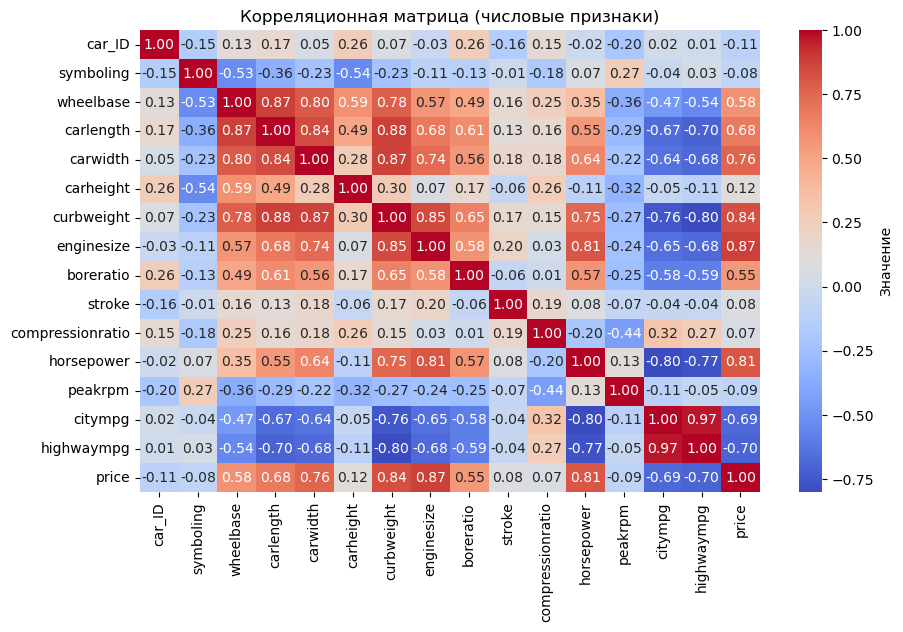

In [15]:
car.heatmap(correlation=True)

In [32]:
cat_car = car.correlation_category("price")
cat_car

CarName  fueltype  aspiration  doornumber   carbody  \
CarName         1.000000 -0.069435    0.019914   -0.171745  0.099691   
fueltype       -0.069435  1.000000   -0.401397    0.191491 -0.147853   
aspiration      0.019914 -0.401397    1.000000   -0.031792  0.063028   
doornumber     -0.171745  0.191491   -0.031792    1.000000 -0.680358   
carbody         0.099691 -0.147853    0.063028   -0.680358  1.000000   
drivewheel     -0.016129 -0.132257    0.066465    0.098954 -0.155745   
enginelocation  0.055968  0.040070   -0.057191    0.137757 -0.277009   
enginetype     -0.090381  0.082695   -0.102963    0.062431 -0.037024   
cylindernumber  0.047154  0.110617   -0.133119    0.154322 -0.048408   
fuelsystem      0.123845  0.041529    0.288086    0.015519 -0.065079   
price          -0.231439 -0.105679    0.177926   -0.031835 -0.083976   

                drivewheel  enginelocation  enginetype  cylindernumber  \
CarName          -0.016129        0.055968   -0.090381        0.047154   
fueltype         -0.132257        0.040070    0.082695        0.110617   
aspiration        0.066465       -0.057191   -0.102963       -0.133119   
doornumber        0.098954        0.137757    0.062431        0.154322   
carbody          -0.155745       -0.277009   -0.037024       -0.048408   
drivewheel        1.000000        0.147865   -0.116823        0.223238   
enginelocation    0.147865        1.000000    0.114127        0.135541   
enginetype       -0.116823        0.114127    1.000000        0.237390   
cylindernumber    0.223238        0.135541    0.237390        1.000000   
fuelsystem        0.424686        0.105971   -0.091787        0.011970   
price             0.577992        0.324973    0.049171       -0.027628   

                fuelsystem     price  
CarName           0.123845 -0.231439  
fueltype          0.041529 -0.105679  
aspiration        0.288086  0.177926  
doornumber        0.015519 -0.031835  
carbody          -0.065079 -0.083976  
drivewheel        0.424686  0.577992  
enginelocation    0.105971  0.324973  
enginetype       -0.091787  0.049171  
cylindernumber    0.011970 -0.027628  
fuelsystem        1.000000  0.526823  
price             0.526823  1.000000

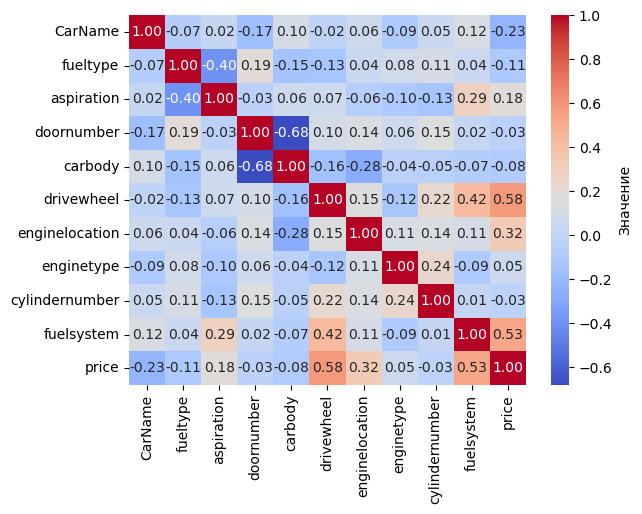

In [20]:
sns.heatmap(cat_car, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': '–ó–Ω–∞—á–µ–Ω–∏–µ'})
plt.show()

## –ü–æ–ø—Ä–æ–±—É–µ –≤—ã—á–∏—Å–ª–∏—Ç—å Mutual Information

In [33]:
# –¶–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è
y = car.df['price']

# –ö–æ–¥–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ (Label Encoding)
categorical_columns = car.df.select_dtypes(include=['object']).columns
df_encoded = car.df.copy()

for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# –£–±–∏—Ä–∞–µ–º —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –∏–∑ X
X = df_encoded.drop(columns=['price'])

In [34]:
# –í—ã—á–∏—Å–ª—è–µ–º MI
mi_scores = mutual_info_regression(X, y)

# –û—Ñ–æ—Ä–º–ª—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç –≤ DataFrame
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

# –í—ã–≤–æ–¥–∏–º —Ç–æ–ø-10 –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
print(mi_scores)

highwaympg          0.866897
curbweight          0.860433
horsepower          0.849041
enginesize          0.836057
citympg             0.728718
carwidth            0.665680
wheelbase           0.580001
carlength           0.557729
fuelsystem          0.466410
boreratio           0.447099
car_ID              0.439454
stroke              0.363237
carheight           0.339752
drivewheel          0.332726
cylindernumber      0.329050
CarName             0.269536
symboling           0.216136
peakrpm             0.203987
enginetype          0.164185
compressionratio    0.163452
aspiration          0.097139
fueltype            0.035909
carbody             0.033039
enginelocation      0.003587
doornumber          0.000000
dtype: float64


–ò—Å–∫–ª—é—á–µ–Ω–∏–µ –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
doornumber (0.000000) ‚Üí –ø–æ–ª–Ω–æ—Å—Ç—å—é –±–µ—Å–ø–æ–ª–µ–∑–µ–Ω, —É–¥–∞–ª—è–µ–º.
enginelocation (0.003587) ‚Üí –æ—á–µ–Ω—å —Å–ª–∞–±–∞—è —Å–≤—è–∑—å —Å —Ü–µ–Ω–æ–π, –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å.
fueltype (0.035909) ‚Üí –Ω–∏–∑–∫–∏–π MI, –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å, 
carbody (0.051613) ‚Üí –º–æ–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å (—Å–ª–∞–±–∞—è —Å–≤—è–∑—å).
aspiration (0.096986) ‚Üí —Å–ª–∞–±–∞—è —Å–≤—è–∑—å

–û—Å—Ç–∞–≤–∏–º —Ç–æ–ª—å–∫–æ –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å MI > 0.1, –æ—Å—Ç–∞–ª—å–Ω—ã–µ —É–¥–∞–ª–∏—Ç—å.

### wheelbase, carlength, carwidth, —ç—Ç–æ —Ä–∞–∑–º–µ—Ä–Ω—ã–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ –º–∞—à–∏–Ω—ã, –∫–æ—Ç–æ—Ä—ã–µ –ª–æ–≥–∏—á–Ω–æ —Å–≤—è–∑–∞–Ω—ã –º–µ–∂–¥—É —Å–æ–±–æ–π. –û–Ω–∏ –≤–ª–∏—è—é—Ç –Ω–∞ —Ü–µ–Ω—É, –Ω–æ –º–æ–≥—É—Ç –±—ã—Ç—å —Å–∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω—ã.

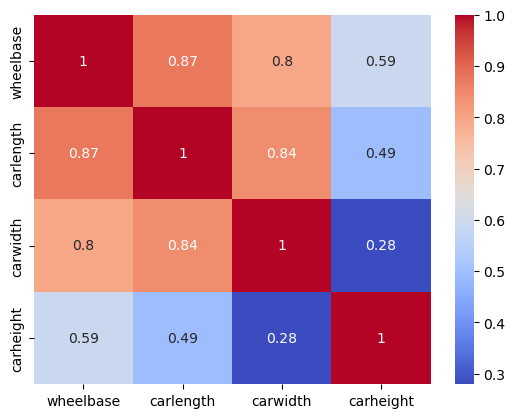

In [36]:
corr_matrix = df_encoded[['wheelbase', 'carlength', 'carwidth', 'carheight']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

### –ü–æ–ª—É—á–µ–Ω–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –¥–æ–≤–æ–ª—å–Ω–æ –≤—ã—Å–æ–∫–∞(–¥–ª—è –≤—Å–µ—Ö –∫—Ä–æ–º–µ carheight), –ø–æ—ç—Ç–æ–º—É –æ–±—ä–µ–¥–∏–Ω–∏–º –æ—Å—Ç–∞–ª—å–Ω—ã–µ –≤ –æ–¥–Ω—É —Ñ–∏—á—É —á—Ç–æ–±—ã –Ω–µ —Ä–∞—Å—Ç—è–≥–∏–≤–∞—Ç—å –≤–µ—Å–∞ –∏ –ø–ª–æ—Ö–æ –≤–ª–∏—è—Ç—å –Ω–∞ –≤–∞–∂–Ω–æ—Å—Ç—å

In [28]:
pca = PCA(n_components=1)
df_encoded['size_feature'] = pca.fit_transform(df_encoded[['wheelbase', 'carlength', 'carwidth']])

# –£–¥–∞–ª—è–µ–º –∏—Å—Ö–æ–¥–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã
df_encoded.drop(columns=['wheelbase', 'carlength', 'carwidth'], inplace=True)

### –ò—Ç–æ–≥–æ–≤—ã–π –≤—ã–≤–æ–¥ –ø–æ –¥–∞–Ω–Ω—ã–º:
–¢–∞–∫ –∫–∞–∫ —Ü–µ–ª–µ–≤–æ–π —Å—Ç–æ–ª–±–µ—Ü —É –Ω–∞—Å —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω—ã–π, –¥–æ–ø—É—Å—Ç–∏–º–æ —É–¥–∞–ª—è—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏ —Å –Ω–∏–∑–∫–æ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π (–ø–æ —á–∏—Å–ª–æ–≤—ã–º –¥–∞–Ω–Ω—ã–º).
–í –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ —ç—Ç–æ:
car_ID (–æ–Ω –ø—Ä–æ—Å—Ç–æ –Ω–µ –∏–º–µ–µ—Ç —Å–º—ã—Å–ª–∞ –¥–ª—è –º–æ–¥–µ–ª–∏), symboling, carheight, stroke, compressionratio, peakrpm.
–ü–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º –∞–Ω–∞–ª–∏–∑a MI –∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —É–¥–∞–ª—è–µ–º:
doornumber, enginelocation, fueltype, carbody, aspiration.
–¢–∞–∫ –∫–∞–∫ –ø—Ä–∏–∑–Ω–∞–∫–∏ wheelbase, carlength, carwidth –∏–º–µ—é—Ç –≤—ã—Å–æ–∫—É—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—é (>0.8), –≤–º–µ—Å—Ç–æ –Ω–∏—Ö —Å–æ–∑–¥–∞—ë–º –Ω–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ size_feature —á–µ—Ä–µ–∑ PCA.

## –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∫ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—é

In [37]:
# –£–¥–∞–ª—è–µ–º —Å—Ç–æ–ª–±—Ü—ã –∫–æ—Ç–æ—Ä—ã–µ –º—ã –æ–ø—Ä–µ–¥–µ–ª–∏–ª–∏ –∫–∞–∫ –Ω–µ–Ω—É–∂–Ω—ã–µ
df_encoded.drop(columns=['car_ID', 'symboling', 'carheight', 'stroke', 'compressionratio', 'peakrpm'], inplace=True)
df_encoded.drop(columns=['doornumber', 'enginelocation', 'fueltype', 'carbody', 'aspiration'], inplace=True)

In [38]:
df_encoded

CarName  drivewheel  wheelbase  carlength  carwidth  curbweight  \
0          2           2       88.6      168.8      64.1        2548   
1          3           2       88.6      168.8      64.1        2548   
2          1           2       94.5      171.2      65.5        2823   
3          4           1       99.8      176.6      66.2        2337   
4          5           0       99.4      176.6      66.4        2824   
..       ...         ...        ...        ...       ...         ...   
200      139           2      109.1      188.8      68.9        2952   
201      138           2      109.1      188.8      68.8        3049   
202      140           2      109.1      188.8      68.9        3012   
203      142           2      109.1      188.8      68.9        3217   
204      143           2      109.1      188.8      68.9        3062   

     enginetype  cylindernumber  enginesize  fuelsystem  boreratio  \
0             0               2         130           5       3.47   
1             0               2         130           5       3.47   
2             5               3         152           5       2.68   
3             3               2         109           5       3.19   
4             3               1         136           5       3.19   
..          ...             ...         ...         ...        ...   
200           3               2         141           5       3.78   
201           3               2         141           5       3.78   
202           5               3         173           5       3.58   
203           3               3         145           3       3.01   
204           3               2         141           5       3.78   

     horsepower  citympg  highwaympg    price  
0           111       21          27  13495.0  
1           111       21          27  16500.0  
2           154       19          26  16500.0  
3           102       24          30  13950.0  
4           115       18          22  17450.0  
..          ...      ...         ...      ...  
200         114       23          28  16845.0  
201         160       19          25  19045.0  
202         134       18          23  21485.0  
203         106       26          27  22470.0  
204         114       19          25  22625.0  

[205 rows x 15 columns]

In [41]:
X = df_encoded.drop(columns=['price'])  
y = df_encoded['price'] 

In [49]:
# –†–∞–∑–±–∏–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã–µ –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã–µ
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, 
                                                  random_state=42)


In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.to_numpy().reshape(-1, 1)).flatten()
y_val_scaled = scaler_y.transform(y_val.to_numpy().reshape(-1, 1)).flatten()


## –°–Ω—á–∞–ª–∞ —Å–¥–µ–ª–∞–µ–º –º–æ–¥–µ–ª—å –Ω–∞ Pytorch

In [53]:
# –ö–æ–Ω–≤–µ—Ä—Ç–∏—Ä—É–µ–º –≤ —Ç–µ–Ω–∑–æ—Ä—ã
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32).unsqueeze(1)  # –î–æ–±–∞–≤–ª—è–µ–º —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å

X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_scaled, dtype=torch.float32).unsqueeze(1)  # –î–æ–±–∞–≤–ª—è–µ–º —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å

In [54]:
# –°–æ–∑–¥–∞—ë–º Dataset
class CarDataset(Dataset):
    def __init__(self, X, y=None):
        self.X = X
        self.y = y  

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        if self.y is not None:
            return self.X[idx], self.y[idx]
        return self.X[idx]

# –°–æ–∑–¥–∞—ë–º –¥–∞—Ç–∞—Å–µ—Ç—ã
train_dataset = CarDataset(X_train_tensor, y_train_tensor)
val_dataset = CarDataset(X_val_tensor, y_val_tensor)  


In [55]:
batch_size = 100
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

In [56]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size=128, hidden_size2=64, num_classes=1):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.batchnorm1 = nn.BatchNorm1d(hidden_size)  # –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –ø–µ—Ä–≤–æ–≥–æ —Å–ª–æ—è
        self.relu = nn.LeakyReLU()

        self.fc2 = nn.Linear(hidden_size, hidden_size2)
        self.batchnorm2 = nn.BatchNorm1d(hidden_size2)  # –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –≤—Ç–æ—Ä–æ–≥–æ —Å–ª–æ—è
        self.leakrelu = nn.LeakyReLU()

        self.fc3 = nn.Linear(hidden_size2, num_classes)  # –î–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏

    def forward(self, x):
        out = self.fc1(x)
        out = self.batchnorm1(out)  # –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –ø–µ—Ä–µ–¥ –∞–∫—Ç–∏–≤–∞—Ü–∏–µ–π
        out = self.relu(out)

        out = self.fc2(out)
        out = self.batchnorm2(out)  # –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –ø–µ—Ä–µ–¥ –∞–∫—Ç–∏–≤–∞—Ü–∏–µ–π
        out = self.leakrelu(out)

        out = self.fc3(out)  # –í—ã—Ö–æ–¥ –±–µ–∑ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ (—Ä–µ–≥—Ä–µ—Å—Å–∏—è)
        return out

In [57]:
# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –æ–±—É—á–µ–Ω–∏—è
num_epochs = 200

# –î–∏—Ä–µ–∫—Ç–æ—Ä–∏—è –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π
os.makedirs("models/car", exist_ok=True)

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–π –ø–æ—Ç–µ—Ä—å –∏ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–æ–≤
loss_functions = {
    "MSE": nn.MSELoss(),
    "Huber": nn.HuberLoss()
}

optimizers = {
    "SGD": lambda model: optim.SGD(model.parameters(), lr=0.01),  
    "Adam": lambda model: optim.Adam(model.parameters(), lr=0.001),
    "RMSprop": lambda model: optim.RMSprop(model.parameters(), lr=0.001),
    "Adagrad": lambda model: optim.Adagrad(model.parameters(), lr=0.01)  
}

# –î–æ—Å—Ç—É–ø–Ω—ã–µ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞
devices = {
    "CPU": torch.device("cpu"),
    "GPU": torch.device("cuda") if torch.cuda.is_available() else None
}

# –°–ª–æ–≤–∞—Ä—å –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
results = []

# –ü–µ—Ä–µ–±–∏—Ä–∞–µ–º –≤—Å–µ –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏
for loss_name, criterion in loss_functions.items():
    for opt_name, opt_func in optimizers.items():
        for device_name, device in devices.items():
            if device is None:  # –ü—Ä–æ–ø—É—Å–∫–∞–µ–º GPU, –µ—Å–ª–∏ –µ–≥–æ –Ω–µ—Ç
                continue

            print(f"\nüîç –¢–µ—Å—Ç–∏—Ä—É–µ–º: {loss_name} + {opt_name} –Ω–∞ {device_name}")

            # –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –º–æ–¥–µ–ª—å
            model = NeuralNet(input_size=X_train_tensor.shape[1]).to(device)

            # –°–æ–∑–¥–∞—ë–º –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä
            optimizer = opt_func(model)

            # –ó–∞–ø—É—Å–∫–∞–µ–º —Ç–∞–π–º–µ—Ä
            start_time = time.time()

            best_train_loss = float("inf")  # –õ—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –Ω–∞ train loss
            best_model_path = f"models/car/{loss_name}_{opt_name}_{device_name}.pth"

            # –°–ø–∏—Å–∫–∏ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –ø–æ—Ç–µ—Ä—å
            train_losses = []

            # Early Stopping
            patience = 5  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö –±–µ–∑ —É–ª—É—á—à–µ–Ω–∏–π
            counter = 0  # –°—á—ë—Ç—á–∏–∫ —ç–ø–æ—Ö –±–µ–∑ —É–ª—É—á—à–µ–Ω–∏—è

            # –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
            for epoch in range(num_epochs):
                model.train()
                running_loss = 0.0

                for X_batch, y_batch in train_loader:
                    X_batch, y_batch = X_batch.to(device), y_batch.to(device)

                    optimizer.zero_grad()
                    outputs = model(X_batch)
                    loss = criterion(outputs, y_batch)
                    loss.backward()
                    optimizer.step()

                    running_loss += loss.item()

                avg_train_loss = running_loss / len(train_loader)
                train_losses.append(avg_train_loss)

                print(f"–≠–ø–æ—Ö–∞ {epoch+1}/{num_epochs} | Train Loss: {avg_train_loss:.4f}")

                # –ü—Ä–æ–≤–µ—Ä—è–µ–º early stopping –Ω–∞ train loss
                if avg_train_loss < best_train_loss:
                    best_train_loss = avg_train_loss
                    counter = 0  # –°–±—Ä–∞—Å—ã–≤–∞–µ–º —Å—á—ë—Ç—á–∏–∫
                    torch.save(model.state_dict(), best_model_path)  # –°–æ—Ö—Ä–∞–Ω—è–µ–º –ª—É—á—à—É—é –º–æ–¥–µ–ª—å
                    print(f"üéØ –ù–æ–≤–∞—è –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞: {best_model_path} (Train Loss: {avg_train_loss:.4f})")
                else:
                    counter += 1
                    print(f"Patience {counter}/{patience}")

                    if counter >= patience:
                        print("‚èπÔ∏è Early stopping: train loss –Ω–µ —É–ª—É—á—à–∞–µ—Ç—Å—è!")
                        break  # –û—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –æ–±—É—á–µ–Ω–∏–µ

            # –û—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º —Ç–∞–π–º–µ—Ä
            end_time = time.time()
            training_time = end_time - start_time

            # –°–æ—Ö—Ä–∞–Ω—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
            results.append({
                "loss": loss_name,
                "optimizer": opt_name,
                "device": device_name,
                "best_train_loss": best_train_loss,
                "training_time": training_time,
                "model_path": best_model_path,
                "train_losses": train_losses
            })

            print(f"‚úÖ –ó–∞–≤–µ—Ä—à–µ–Ω–æ: {loss_name} + {opt_name} –Ω–∞ {device_name} | Best Train Loss: {best_train_loss:.4f} | Time: {training_time:.2f} —Å–µ–∫")

# –í—ã–≤–æ–¥–∏–º –≤—Å–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
print("\nüìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:")
for res in results:
    print(f"{res['loss']} + {res['optimizer']} –Ω–∞ {res['device']} | Best Train Loss: {res['best_train_loss']:.4f} | Time: {res['training_time']:.2f} —Å–µ–∫ | –ú–æ–¥–µ–ª—å: {res['model_path']}")


üîç –¢–µ—Å—Ç–∏—Ä—É–µ–º: MSE + SGD –Ω–∞ CPU
–≠–ø–æ—Ö–∞ 1/200 | Train Loss: 1.3461
üéØ –ù–æ–≤–∞—è –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞: models/car/MSE_SGD_CPU.pth (Train Loss: 1.3461)
–≠–ø–æ—Ö–∞ 2/200 | Train Loss: 0.6050
üéØ –ù–æ–≤–∞—è –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞: models/car/MSE_SGD_CPU.pth (Train Loss: 0.6050)
–≠–ø–æ—Ö–∞ 3/200 | Train Loss: 0.3359
üéØ –ù–æ–≤–∞—è –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞: models/car/MSE_SGD_CPU.pth (Train Loss: 0.3359)
–≠–ø–æ—Ö–∞ 4/200 | Train Loss: 0.3151
üéØ –ù–æ–≤–∞—è –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞: models/car/MSE_SGD_CPU.pth (Train Loss: 0.3151)
–≠–ø–æ—Ö–∞ 5/200 | Train Loss: 0.1964
üéØ –ù–æ–≤–∞—è –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞: models/car/MSE_SGD_CPU.pth (Train Loss: 0.1964)
–≠–ø–æ—Ö–∞ 6/200 | Train Loss: 0.1902
üéØ –ù–æ–≤–∞—è –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞: models/car/MSE_SGD_CPU.pth (Train Loss: 0.1902)
–≠–ø–æ—Ö–∞ 7/200 | Train Loss: 0.1687
üéØ –ù–æ–≤–∞—è –ª—É—á—à–∞—è 

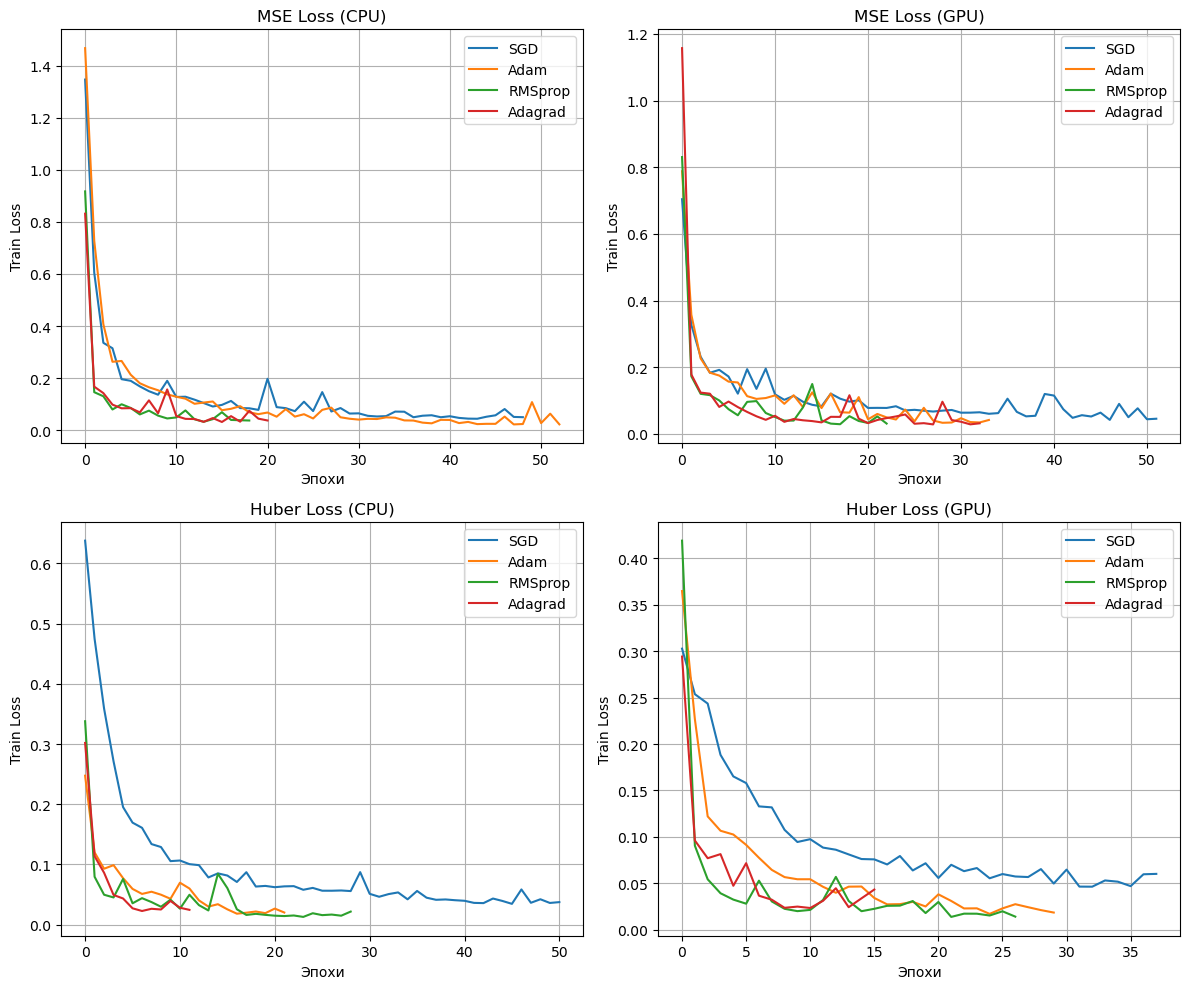

In [60]:
# –§–∏–ª—å—Ç—Ä—É–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
mse_cpu = [res for res in results if res["loss"] == "MSE" and res["device"] == "CPU"]
mse_gpu = [res for res in results if res["loss"] == "MSE" and res["device"] == "GPU"]
huber_cpu = [res for res in results if res["loss"] == "Huber" and res["device"] == "CPU"]
huber_gpu = [res for res in results if res["loss"] == "Huber" and res["device"] == "GPU"]

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –≥—Ä–∞—Ñ–∏–∫–∞
def plot_losses(ax, results, title):
    for res in results:
        ax.plot(res["train_losses"], label=f"{res['optimizer']}")

    ax.set_xlabel("–≠–ø–æ—Ö–∏")
    ax.set_ylabel("Train Loss")
    ax.set_title(title)
    ax.legend()
    ax.grid()

# –°–æ–∑–¥–∞—ë–º 2x2 –≥—Ä–∞—Ñ–∏–∫–∏
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plot_losses(axes[0, 0], mse_cpu, "MSE Loss (CPU)")
plot_losses(axes[0, 1], mse_gpu, "MSE Loss (GPU)")
plot_losses(axes[1, 0], huber_cpu, "Huber Loss (CPU)")
plot_losses(axes[1, 1], huber_gpu, "Huber Loss (GPU)")

plt.tight_layout()
plt.show()

### –í—ã–≤–æ–¥—ã: –õ—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã (–Ω–∞–∏–º–µ–Ω—å—à–∞—è –æ—à–∏–±–∫–∞):

Huber + RMSprop –Ω–∞ CPU (0.0126)
Huber + RMSprop –Ω–∞ GPU (0.0137)
Huber + Adam –Ω–∞ GPU (0.0170)
–≠—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ Huber Loss —Ä–∞–±–æ—Ç–∞–µ—Ç –ª—É—á—à–µ, —á–µ–º MSE, –∞ —Å—Ä–µ–¥–∏ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–æ–≤ RMSprop –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞–∏–ª—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã.

–†–∞–∑–Ω–∏—Ü–∞ CPU vs GPU:

–í MSE + SGD –Ω–∞ GPU –≤—ã–∏–≥—Ä—ã–≤–∞–µ—Ç (0.0422 –ø—Ä–æ—Ç–∏–≤ 0.0446 –Ω–∞ CPU).
–í Huber + Adam GPU —Å–Ω–æ–≤–∞ –ª—É—á—à–µ (0.0170 –ø—Ä–æ—Ç–∏–≤ 0.0180).
–ù–æ –≤ Huber + RMSprop CPU –Ω–µ–º–Ω–æ–≥–æ –ª—É—á—à–µ (0.0126 –ø—Ä–æ—Ç–∏–≤ 0.0137).
–≠—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ —Ç–æ, —á—Ç–æ –¥–ª—è –Ω–µ–±–æ–ª—å—à–∏—Ö —Å–µ—Ç–µ–π CPU –º–æ–∂–µ—Ç –±—ã—Ç—å —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–µ–µ –¥–ª—è RMSprop, —Ç–∞–∫ –∫–∞–∫ –æ–±—Ä–∞–±–æ—Ç–∫–∞ –º–∞–ª—ã—Ö –±–∞—Ç—á–µ–π –∏–Ω–æ–≥–¥–∞ –±—ã—Å—Ç—Ä–µ–µ –Ω–∞ CPU –∏–∑-–∑–∞ –Ω–∞–∫–ª–∞–¥–Ω—ã—Ö —Ä–∞—Å—Ö–æ–¥–æ–≤ –Ω–∞ –ø–µ—Ä–µ–¥–∞—á—É –¥–∞–Ω–Ω—ã—Ö –≤ GPU.

–°–∫–æ—Ä–æ—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è:

Adam –∏ RMSprop –Ω–∞ CPU –±—ã—Å—Ç—Ä–µ–µ, —á–µ–º –Ω–∞ GPU.
GPU –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –≤—ã–∏–≥—Ä—ã—à –ø–æ —Å–∫–æ—Ä–æ—Å—Ç–∏ —Ç–æ–ª—å–∫–æ –≤ Adagrad –∏ MSE —Å SGD.
–°–∫–æ—Ä–µ–µ –≤—Å–µ –ø–æ—Ç–æ–º, —á—Ç–æ  GPU  –Ω–∞ –º–∞–ª–µ–Ω—å–∫–∏—Ö –º–æ–¥–µ–ª—è—Ö —Ç—Ä–∞—Ç–∏—Ç –±–æ–ª—å—à–µ –≤—Ä–µ–º–µ–Ω–∏ –Ω–∞ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—é —á–µ–º –Ω–∞ —Ä–∞–±–æ—Ç—É.

–í—ã–≤–æ–¥: –ü—Ä–µ–¥–∏–∫—Ç—ã –ø–æ –≤—Å–µ–º –º–æ–¥–µ–ª—è–º –º—ã –¥–µ–ª–∞—Ç—å –Ω–µ –±—É–¥–µ–º. –ú—ã –æ–±—É—á–∏–º –Ω–æ–≤—É—é –º–æ–∂–¥–µ–ª—å –Ω–∞ Huber + RMSprop —Å —Ä–∞–∑–Ω—ã–º–∏–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏. 

In [61]:
# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –æ–±—É—á–µ–Ω–∏—è
num_epochs = 200

# –î–∏—Ä–µ–∫—Ç–æ—Ä–∏—è –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π
os.makedirs("models/car", exist_ok=True)

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–π –ø–æ—Ç–µ—Ä—å –∏ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–æ–≤
loss_functions = {
    "Huber": nn.HuberLoss()
}

# –û–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä—ã (—Ä–∞–∑–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã RMSprop)
optimizers = {
    "RMSprop_alpha_0.9_momentum_0.0": lambda model: optim.RMSprop(model.parameters(), lr=0.001, momentum=0.0, alpha=0.9),
    "RMSprop_alpha_0.99_momentum_0.0": lambda model: optim.RMSprop(model.parameters(), lr=0.001, momentum=0.0, alpha=0.99),
    "RMSprop_alpha_0.9_momentum_0.9": lambda model: optim.RMSprop(model.parameters(), lr=0.001, momentum=0.9, alpha=0.9),
    "RMSprop_alpha_0.99_momentum_0.9": lambda model: optim.RMSprop(model.parameters(), lr=0.001, momentum=0.9, alpha=0.99),
    "RMSprop_alpha_0.9_momentum_0.0_lr_0.01": lambda model: optim.RMSprop(model.parameters(), lr=0.01, momentum=0.0, alpha=0.9),
    "RMSprop_alpha_0.99_momentum_0.0_lr_0.01": lambda model: optim.RMSprop(model.parameters(), lr=0.01, momentum=0.0, alpha=0.99),
    "RMSprop_alpha_0.9_momentum_0.9_lr_0.01": lambda model: optim.RMSprop(model.parameters(), lr=0.01, momentum=0.9, alpha=0.9),
    "RMSprop_alpha_0.99_momentum_0.9_lr_0.01": lambda model: optim.RMSprop(model.parameters(), lr=0.01, momentum=0.9, alpha=0.99),
    "RMSprop_alpha_0.9_momentum_0.5": lambda model: optim.RMSprop(model.parameters(), lr=0.001, momentum=0.5, alpha=0.9),
    "RMSprop_alpha_0.9_momentum_0.7": lambda model: optim.RMSprop(model.parameters(), lr=0.001, momentum=0.7, alpha=0.9),
    "RMSprop_alpha_0.9_momentum_0.3": lambda model: optim.RMSprop(model.parameters(), lr=0.001, momentum=0.3, alpha=0.9),
    "RMSprop_alpha_0.8_momentum_0.5": lambda model: optim.RMSprop(model.parameters(), lr=0.001, momentum=0.7, alpha=0.8),
    "RMSprop_alpha_0.85_momentum_0.7": lambda model: optim.RMSprop(model.parameters(), lr=0.001, momentum=0.7, alpha=0.85),
    "RMSprop_alpha_0.9_momentum_0.7_lr_0.0005": lambda model: optim.RMSprop(model.parameters(), lr=0.0005, momentum=0.7, alpha=0.9),
}

# –î–æ—Å—Ç—É–ø–Ω—ã–µ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞
devices = {
    "CPU": torch.device("cpu"),
    # "GPU": torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
}

# –°–ª–æ–≤–∞—Ä—å –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
results = []

# –ü–µ—Ä–µ–±–∏—Ä–∞–µ–º –≤—Å–µ –∫–æ–º–±–∏–Ω–∞—Ü–∏–∏
for loss_name, criterion in loss_functions.items():
    for opt_name, opt_func in optimizers.items():
        for device_name, device in devices.items():
            if device is None:  # –ü—Ä–æ–ø—É—Å–∫–∞–µ–º GPU, –µ—Å–ª–∏ –µ–≥–æ –Ω–µ—Ç
                continue

            print(f"\nüîç –¢–µ—Å—Ç–∏—Ä—É–µ–º: {loss_name} + {opt_name} –Ω–∞ {device_name}")

            # –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –º–æ–¥–µ–ª—å
            model = NeuralNet(input_size=X_train_tensor.shape[1]).to(device)

            # –°–æ–∑–¥–∞—ë–º –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä
            optimizer = opt_func(model)

            # –ó–∞–ø—É—Å–∫–∞–µ–º —Ç–∞–π–º–µ—Ä
            start_time = time.time()

            best_train_loss = float("inf")  # –õ—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –Ω–∞ train loss
            best_model_path = f"models/car/{loss_name}_{opt_name}_{device_name}.pth"

            # –°–ø–∏—Å–∫–∏ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –ø–æ—Ç–µ—Ä—å
            train_losses = []

            # Early Stopping
            patience = 5  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö –±–µ–∑ —É–ª—É—á—à–µ–Ω–∏–π
            counter = 0  # –°—á—ë—Ç—á–∏–∫ —ç–ø–æ—Ö –±–µ–∑ —É–ª—É—á—à–µ–Ω–∏—è

            # –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
            for epoch in range(num_epochs):
                model.train()
                running_loss = 0.0

                for X_batch, y_batch in train_loader:
                    X_batch, y_batch = X_batch.to(device), y_batch.to(device)

                    optimizer.zero_grad()
                    outputs = model(X_batch)
                    loss = criterion(outputs, y_batch)
                    loss.backward()
                    optimizer.step()

                    running_loss += loss.item()

                avg_train_loss = running_loss / len(train_loader)
                train_losses.append(avg_train_loss)

                print(f"–≠–ø–æ—Ö–∞ {epoch+1}/{num_epochs} | Train Loss: {avg_train_loss:.4f}")

                # –ü—Ä–æ–≤–µ—Ä—è–µ–º early stopping –Ω–∞ train loss
                if avg_train_loss < best_train_loss:
                    best_train_loss = avg_train_loss
                    counter = 0  # –°–±—Ä–∞—Å—ã–≤–∞–µ–º —Å—á—ë—Ç—á–∏–∫
                    torch.save(model.state_dict(), best_model_path)  # –°–æ—Ö—Ä–∞–Ω—è–µ–º –ª—É—á—à—É—é –º–æ–¥–µ–ª—å
                    print(f"üéØ –ù–æ–≤–∞—è –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞: {best_model_path} (Train Loss: {avg_train_loss:.4f})")
                else:
                    counter += 1
                    print(f"Patience {counter}/{patience}")

                    if counter >= patience:
                        print("‚èπÔ∏è Early stopping: train loss –Ω–µ —É–ª—É—á—à–∞–µ—Ç—Å—è!")
                        break  # –û—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –æ–±—É—á–µ–Ω–∏–µ

            # –û—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º —Ç–∞–π–º–µ—Ä
            end_time = time.time()
            training_time = end_time - start_time

            # –°–æ—Ö—Ä–∞–Ω—è–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
            results.append({
                "loss": loss_name,
                "optimizer": opt_name,
                "device": device_name,
                "best_train_loss": best_train_loss,
                "training_time": training_time,
                "model_path": best_model_path,
                "train_losses": train_losses
            })

            print(f"‚úÖ –ó–∞–≤–µ—Ä—à–µ–Ω–æ: {loss_name} + {opt_name} –Ω–∞ {device_name} | Best Train Loss: {best_train_loss:.4f} | Time: {training_time:.2f} —Å–µ–∫")

# –í—ã–≤–æ–¥–∏–º –≤—Å–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
print("\nüìä –ò—Ç–æ–≥–æ–≤—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:")
for res in results:
    print(f"{res['loss']} + {res['optimizer']} –Ω–∞ {res['device']} | Best Train Loss: {res['best_train_loss']:.4f} | Time: {res['training_time']:.2f} —Å–µ–∫ | –ú–æ–¥–µ–ª—å: {res['model_path']}")


üîç –¢–µ—Å—Ç–∏—Ä—É–µ–º: Huber + RMSprop_alpha_0.9_momentum_0.0 –Ω–∞ CPU
–≠–ø–æ—Ö–∞ 1/200 | Train Loss: 0.3955
üéØ –ù–æ–≤–∞—è –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞: models/car/Huber_RMSprop_alpha_0.9_momentum_0.0_CPU.pth (Train Loss: 0.3955)
–≠–ø–æ—Ö–∞ 2/200 | Train Loss: 0.1042
üéØ –ù–æ–≤–∞—è –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞: models/car/Huber_RMSprop_alpha_0.9_momentum_0.0_CPU.pth (Train Loss: 0.1042)
–≠–ø–æ—Ö–∞ 3/200 | Train Loss: 0.0730
üéØ –ù–æ–≤–∞—è –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞: models/car/Huber_RMSprop_alpha_0.9_momentum_0.0_CPU.pth (Train Loss: 0.0730)
–≠–ø–æ—Ö–∞ 4/200 | Train Loss: 0.0814
Patience 1/5
–≠–ø–æ—Ö–∞ 5/200 | Train Loss: 0.0663
üéØ –ù–æ–≤–∞—è –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞: models/car/Huber_RMSprop_alpha_0.9_momentum_0.0_CPU.pth (Train Loss: 0.0663)
–≠–ø–æ—Ö–∞ 6/200 | Train Loss: 0.0489
üéØ –ù–æ–≤–∞—è –ª—É—á—à–∞—è –º–æ–¥–µ–ª—å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞: models/car/Huber_RMSprop_alpha_0.9_momentum_0.0_CPU.pth (Train Loss

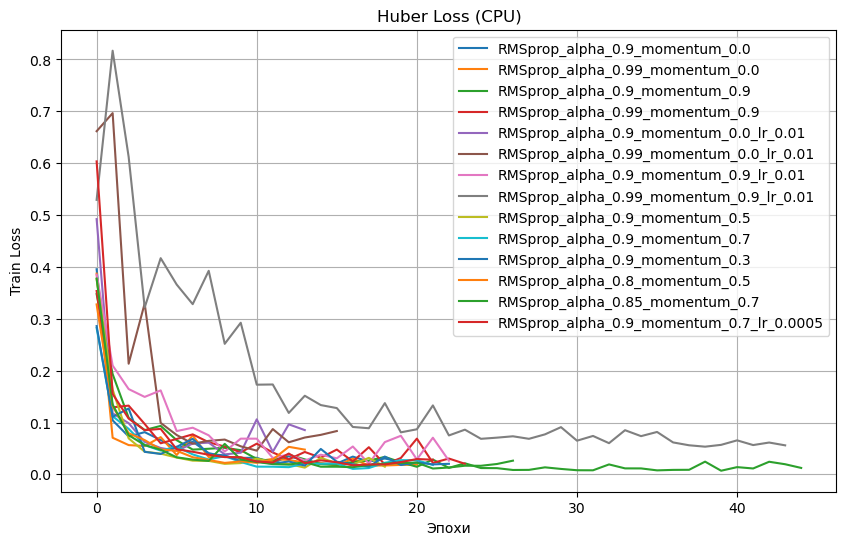

In [68]:
# –§–∏–ª—å—Ç—Ä—É–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
huber_cpu = [res for res in results if res["loss"] == "Huber" and res["device"] == "CPU"]

# –°—Ç—Ä–æ–∏–º –æ–¥–∏–Ω –≥—Ä–∞—Ñ–∏–∫
plt.figure(figsize=(10, 6))
for res in huber_cpu:
    plt.plot(res["train_losses"], label=f"{res['optimizer']}")

plt.xlabel("–≠–ø–æ—Ö–∏")
plt.ylabel("Train Loss")
plt.title("Huber Loss (CPU)")
plt.legend()
plt.grid()
plt.show()

–õ—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ø–æ Best Train Loss –ø–æ–∫–∞–∑–∞–ª–∞ –º–æ–¥–µ–ª—å —Å Huber Loss + RMSprop(alpha=0.9, momentum=0.9):
Loss: 0.0070
Time: 0.36 —Å–µ–∫

–í—ã–≤–æ–¥—ã:

–ú–µ–Ω—å—à–∏–π lr (0.001) + –≤—ã—Å–æ–∫–∏–π momentum (0.9) –¥–∞–ª–∏ –ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç.
–£–≤–µ–ª–∏—á–µ–Ω–∏–µ alpha –¥–æ 0.99 —É—Ö—É–¥—à–∏–ª–æ Loss –≤ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–µ —Å–ª—É—á–∞–µ–≤.
–£–≤–µ–ª–∏—á–µ–Ω–∏–µ lr –¥–æ 0.01 –ø—Ä–∏–≤–µ–ª–æ –∫ —Ä–æ—Å—Ç—É Loss (—á—Ä–µ–∑–º–µ—Ä–Ω–æ–µ –æ–±–Ω–æ–≤–ª–µ–Ω–∏–µ –≤–µ—Å–æ–≤).
–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –±–∞–ª–∞–Ω—Å: alpha=0.9, momentum=0.9, lr=0.001.


In [72]:
# –ó–∞–≥—Ä—É–∂–∞–µ–º –ª—É—á—à—É—é –º–æ–¥–µ–ª—å
best_model_path = "models/car/Huber_RMSprop_alpha_0.9_momentum_0.9_CPU.pth"  # –ø—É—Ç—å –∫ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏
model = NeuralNet(input_size=X_train_tensor.shape[1])
model.load_state_dict(torch.load(best_model_path, map_location=torch.device("cpu"), weights_only=True))

model.eval()  # –ü–µ—Ä–µ–≤–æ–¥–∏–º –≤ —Ä–µ–∂–∏–º –∏–Ω—Ñ–µ—Ä–µ–Ω—Å–∞

# –ó–∞–≥—Ä—É–∂–∞–µ–º —Ç–µ—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ –∏ –Ω–æ—Ä–º–∞–ª–∏–∑—É–µ–º –∏—Ö
X_test_scaled = X_val_scaled  # –ò—Å–ø–æ–ª—å–∑—É–µ–º –≤–∞–ª–∏–¥–∞—Ü–∏—é –∫–∞–∫ —Ç–µ—Å—Ç
X_test_tensor = X_val_tensor  # –ò—Å–ø–æ–ª—å–∑—É–µ–º —Ç–æ—Ç –∂–µ —Ç–µ–Ω–∑–æ—Ä

# –î–µ–ª–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
with torch.no_grad():
    y_pred_scaled = model(X_test_tensor).numpy()

# –î–µ–Ω–æ—Ä–º–∞–ª–∏–∑—É–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred = scaler_y.inverse_transform(y_pred_scaled)

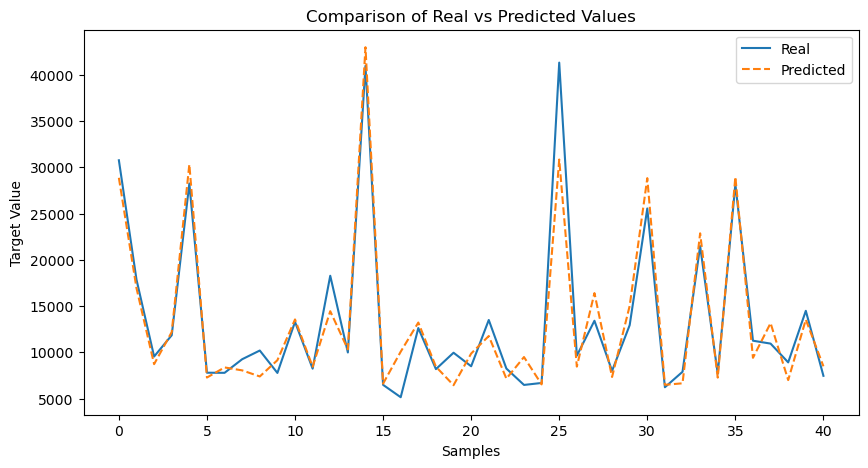

In [74]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π vs —Ä–µ–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
plt.figure(figsize=(10, 5))
plt.plot(y_val.to_numpy(), label="Real")
plt.plot(y_pred, label="Predicted", linestyle="dashed")
plt.xlabel("Samples")
plt.ylabel("Target Value")
plt.title("Comparison of Real vs Predicted Values")
plt.legend()
plt.show()

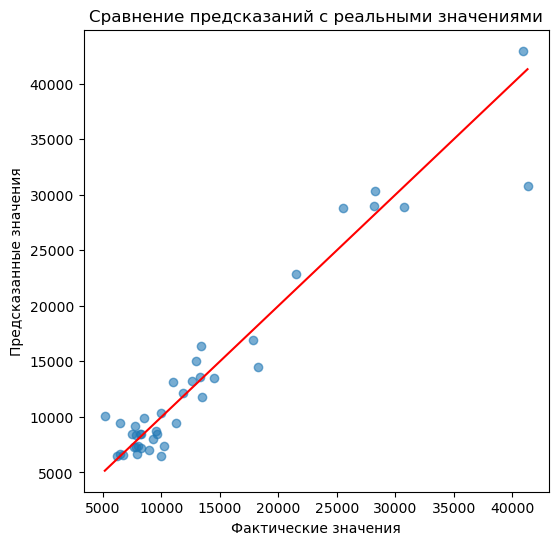

In [75]:
# –ü–æ—Å—Ç—Ä–æ–∏–º scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(y_val, y_pred, alpha=0.6)
plt.xlabel('–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.ylabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π —Å —Ä–µ–∞–ª—å–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')  # –õ–∏–Ω–∏—è –∏–¥–µ–∞–ª—å–Ω–æ–≥–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
plt.show()

### –†–∞—Å—Å—á–∏—Ç–∞–µ–º —Ç–æ—á–Ω–æ—Å—Ç–Ω—ã–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏

In [82]:
r2 = r2_score(y_val, y_pred)
print(f"R¬≤ score: {r2:.4f}")


mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)  # –ö–æ—Ä–µ–Ω—å –∏–∑ MSE

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


y_val_1d = y_val.to_numpy().flatten()  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ 1D-–º–∞—Å—Å–∏–≤
y_pred_1d = y_pred.flatten()  # –£–±–∏—Ä–∞–µ–º –ª–∏—à–Ω—é—é –æ—Å—å, –µ—Å–ª–∏ –µ—Å—Ç—å

mape = np.mean(np.abs((y_val_1d - y_pred_1d) / y_val_1d)) * 100
print(f"MAPE: {mape:.2f}%")


R¬≤ score: 0.9239
MAE: 1675.0711
MSE: 6007004.9115
RMSE: 2450.9192
MAPE: 14.10%


/home/saatarko/.conda/envs/HomeworkDS/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R¬≤ score (–∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏) - 0.9239
- 92.39% –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –≤ –¥–∞–Ω–Ω—ã—Ö –æ–±—ä—è—Å–Ω—è–µ—Ç—Å—è –º–æ–¥–µ–ª—å—é. –ß–µ–º –±–ª–∏–∂–µ –∫ 1, —Ç–µ–º –ª—É—á—à–µ.
MAE (Mean Absolute Error) - 1675.07
- –°—Ä–µ–¥–Ω—è—è –∞–±—Å–æ–ª—é—Ç–Ω–∞—è –æ—à–∏–±–∫–∞ - 1675 –µ–¥–∏–Ω–∏—Ü.
MSE (Mean Squared Error) - 6,007,004
- –ö–≤–∞–¥—Ä–∞—Ç —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–π –æ—à–∏–±–∫–∏. –ß–µ–º –º–µ–Ω—å—à–µ, —Ç–µ–º –ª—É—á—à–µ.
RMSE (Root Mean Squared Error) - 2450.92
- –°–∏–ª—å–Ω–µ–µ —à—Ç—Ä–∞—Ñ—É–µ—Ç –±–æ–ª—å—à–∏–µ –æ—à–∏–±–∫–∏ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å MAE.
MAPE (Mean Absolute Percentage Error) - 14.10%
- –°—Ä–µ–¥–Ω–∏–π –ø—Ä–æ—Ü–µ–Ω—Ç –æ—à–∏–±–∫–∏ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 14.1%.


## –ü–æ–ø—Ä–æ–±—É–µ–º —Å—Ç—ç–∫–∏–Ω–≥ –Ω–∞ —Ç–æ–ø-3 –∏–∑ –æ–±—â–∏—Ö –º–æ–¥–µ–ª–µ–π (–≥–¥–µ –º—ã –ø–æ–¥–±–∏—Ä–∞–ª–∏ —Ñ—É–Ω–∫—Ü–∏—é –ø–æ—Ç–µ—Ä—å –∏ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä)
–°—É–¥—è –ø–æ Best Train Loss —ç—Ç–æ:

Huber + RMSprop –Ω–∞ CPU ‚Üí 0.0126
Huber + Adam –Ω–∞ GPU ‚Üí 0.0170
MSE + Adam –Ω–∞ CPU ‚Üí 0.0229


In [86]:
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∑–∞–≥—Ä—É–∑–∫–∏ –º–æ–¥–µ–ª–∏ –∏ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
def get_predictions(model_path, X_tensor):
    model = NeuralNet(input_size=X_tensor.shape[1])
    model.load_state_dict(torch.load(model_path, map_location=torch.device("cpu"), weights_only=True))
    model.eval()
    with torch.no_grad():
        return model(X_tensor).numpy()

# –ó–∞–≥—Ä—É–∂–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è 3-—Ö –º–æ–¥–µ–ª–µ–π
y_pred_1 = get_predictions("models/car/Huber_RMSprop_CPU.pth", X_val_tensor)
y_pred_2 = get_predictions("models/car/Huber_Adam_GPU.pth", X_val_tensor)
y_pred_3 = get_predictions("models/car/MSE_Adam_CPU.pth", X_val_tensor)

# –°–æ–∑–¥–∞—ë–º –Ω–æ–≤—ã–π –¥–∞—Ç–∞—Å–µ—Ç –¥–ª—è –º–µ—Ç–∞-–º–æ–¥–µ–ª–∏
X_meta = np.column_stack([y_pred_1, y_pred_2, y_pred_3])
y_meta = y_val  # –ò—Å—Ç–∏–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è

# –û–±—É—á–∞–µ–º –ø—Ä–æ—Å—Ç—É—é –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é –∫–∞–∫ –º–µ—Ç–∞-–º–æ–¥–µ–ª—å
meta_model = LinearRegression()
meta_model.fit(X_meta, y_meta)

# –î–µ–ª–∞–µ–º —Ñ–∏–Ω–∞–ª—å–Ω—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred_final = meta_model.predict(X_meta)

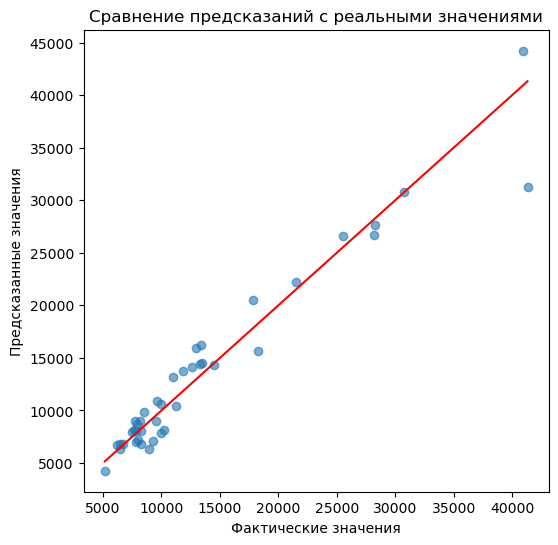

In [88]:
# –ü–æ—Å—Ç—Ä–æ–∏–º scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(y_val, y_pred_final, alpha=0.6)
plt.xlabel('–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.ylabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π —Å —Ä–µ–∞–ª—å–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')  # –õ–∏–Ω–∏—è –∏–¥–µ–∞–ª—å–Ω–æ–≥–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
plt.show()

In [87]:

r2 = r2_score(y_meta, y_pred_final)
mae = mean_absolute_error(y_meta, y_pred_final)
rmse = mean_squared_error(y_meta, y_pred_final, squared=False)

print(f"Stacked R¬≤: {r2:.4f}")
print(f"Stacked MAE: {mae:.2f}")
print(f"Stacked RMSE: {rmse:.2f}")


Stacked R¬≤: 0.9400
Stacked MAE: 1449.26
Stacked RMSE: 2175.54


/home/saatarko/.conda/envs/HomeworkDS/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### –í—ã–≤–æ–¥:  R¬≤ –≤—ã—Ä–æ—Å –¥–æ 0.94 ‚Üí –º–æ–¥–µ–ª—å –ª—É—á—à–µ –æ–±—ä—è—Å–Ω—è–µ—Ç –¥–∏—Å–ø–µ—Ä—Å–∏—é –¥–∞–Ω–Ω—ã—Ö.
üîπ MAE –∏ RMSE —Å–Ω–∏–∑–∏–ª–∏—Å—å ‚Üí –æ—à–∏–±–∫–∏ —Å—Ç–∞–ª–∏ –º–µ–Ω—å—à–µ, –∑–Ω–∞—á–∏—Ç, –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Å—Ç–∞–ª–∏ —Ç–æ—á–Ω–µ–µ.
üîπ –ì—Ä–∞—Ñ–∏–∫ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç, —á—Ç–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –±–ª–∏–∂–µ –∫ –∏–¥–µ–∞–ª—å–Ω–æ–π –ª–∏–Ω–∏–∏.

## –ü–æ–ø—Ä–æ–±—É–µ–º —Å–¥–µ–ª–∞—Ç—å –µ—â–µ –æ–¥–Ω—É –º–µ—Ç–∞–º–æ–¥–µ–ª—å (XGBoost) –ø–æ —Ç–æ–ø-5 –º–æ–¥–µ–ª–µ–π
–¢–æ–ø-5 –º–æ–¥–µ–ª–µ–π –∏–∑ —Å–ø–∏—Å–∫–∞:

Huber + RMSprop –Ω–∞ CPU - 0.0126
Huber + RMSprop –Ω–∞ GPU - 0.0137
Huber + Adam –Ω–∞ GPU - 0.0170
Huber + Adam –Ω–∞ CPU - 0.0180
MSE + Adam –Ω–∞ CPU - 0.0229

In [94]:
# –ó–∞–≥—Ä—É–∂–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Ç–æ–ø-5 –º–æ–¥–µ–ª–µ–π
model_paths = [
    "models/car/Huber_RMSprop_CPU.pth",
    "models/car/Huber_RMSprop_GPU.pth",
    "models/car/Huber_Adam_GPU.pth",
    "models/car/Huber_Adam_CPU.pth",
    "models/car/MSE_Adam_CPU.pth",
]

meta_features = []

for path in model_paths:
    model = NeuralNet(input_size=X_train_tensor.shape[1])
    model.load_state_dict(torch.load(path, map_location=torch.device("cpu"), weights_only=True))
    model.eval()
    
    with torch.no_grad():
        y_pred_scaled = model(X_val_tensor).numpy()
    
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    meta_features.append(y_pred.flatten())

# –§–æ—Ä–º–∏—Ä—É–µ–º X_train_meta (—Ä–∞–∑–º–µ—Ä [–∫–æ–ª-–≤–æ –æ–±—Ä–∞–∑—Ü–æ–≤, 5])
X_train_meta = np.column_stack(meta_features)

# –û–±—É—á–∞–µ–º XGBoost –Ω–∞ –Ω–æ–≤—ã—Ö —Ñ–∏—á–∞—Ö
xgb_model = xgb.XGBRegressor(
    n_estimators=100,  # –û–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ–º —á–∏—Å–ª–æ –¥–µ—Ä–µ–≤—å–µ–≤
    max_depth=4,       # –û–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ–º –≥–ª—É–±–∏–Ω—É –¥–µ—Ä–µ–≤—å–µ–≤
    learning_rate=0.1, # –ß—É—Ç—å —É–º–µ–Ω—å—à–∏–º —à–∞–≥ –æ–±—É—á–µ–Ω–∏—è
    subsample=0.8,     # –ë–µ—Ä—ë–º 80% –¥–∞–Ω–Ω—ã—Ö –≤ –∫–∞–∂–¥–æ–º –¥–µ—Ä–µ–≤–µ (—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è)
    colsample_bytree=0.8, # 80% —Ñ–∏—á–µ–π –Ω–∞ –∫–∞–∂–¥–æ–µ –¥–µ—Ä–µ–≤–æ
    random_state=42
)

xgb_model.fit(X_train_meta, y_val)
# –î–µ–ª–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred_xgb = xgb_model.predict(X_train_meta)


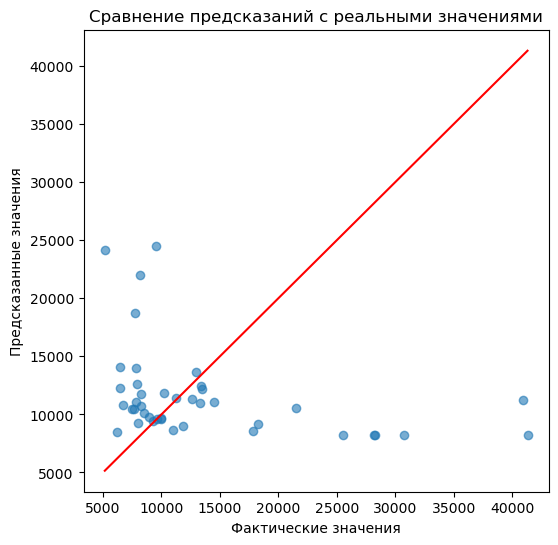

In [144]:
# –ü–æ—Å—Ç—Ä–æ–∏–º scatter plot

plt.figure(figsize=(6, 6))
plt.scatter(y_val, y_pred_xgb, alpha=0.6)
plt.xlabel('–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.ylabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π —Å —Ä–µ–∞–ª—å–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')  # –õ–∏–Ω–∏—è –∏–¥–µ–∞–ª—å–Ω–æ–≥–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
plt.show()

In [95]:
# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
r2 = r2_score(y_val, y_pred_xgb)
mae = mean_absolute_error(y_val, y_pred_xgb)
rmse = mean_squared_error(y_val, y_pred_xgb, squared=False)
mape = np.mean(np.abs((y_val - y_pred_xgb) / y_val)) * 100

# –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
print(f"XGBoost R¬≤: {r2:.4f}")
print(f"XGBoost MAE: {mae:.2f}")
print(f"XGBoost RMSE: {rmse:.2f}")
print(f"XGBoost MAPE: {mape:.2f}%")

XGBoost R¬≤: 0.9998
XGBoost MAE: 91.35
XGBoost RMSE: 121.41
XGBoost MAPE: 0.89%


/home/saatarko/.conda/envs/HomeworkDS/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### –ù–µ—Å–º–æ—Ç—Ä—è –Ω–∞ R¬≤: 0.9998 - –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ –¥–∞–Ω–Ω—ã–µ —Å–ª–∏—à–∫–æ —Ä–∞—â–∑–±—Ä–æ—Å–∞–Ω—ã. –¢.–µ —ç—Ç–æ —è–≤–Ω–æ–µ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ.

## –¢–µ–ø–µ—Ä—å –ø–æ–ø—Ä–æ–±—É–µ–º –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –º–æ–¥–µ–ª–∏ —Å –ø–æ–º–æ—â—å—é tensorflow

### –í–Ω–∞—á–∞–ª–µ –∏—Å–ø–æ–ª—å–∑—É–µ–º –¥–∞–Ω–Ω—ã–µ –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä–∞ –∏ loss -–ª—É—á—à–∏–µ –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –≤ pytorch

In [132]:
X_keras = df_encoded.drop(columns=['price'])  
y_keras = df_encoded['price'] 

In [133]:
# –†–∞–∑–±–∏–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã–µ –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã–µ
X_train, X_val, y_train, y_val = train_test_split(X_keras, y_keras, test_size=0.2, 
                                                  random_state=42)


In [134]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.to_numpy().reshape(-1, 1)).flatten()
y_val_scaled = scaler_y.transform(y_val.to_numpy().reshape(-1, 1)).flatten()

In [136]:
# –°–æ–∑–¥–∞—ë–º –º–æ–¥–µ–ª—å

model_tensor = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled.shape[1],)),  # –í—Ö–æ–¥–Ω–æ–π —Å–ª–æ–π

    keras.layers.Dense(128),  
    keras.layers.BatchNormalization(),  # –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –ø–µ—Ä–µ–¥ LeakyReLU
    keras.layers.LeakyReLU(),  

    keras.layers.Dense(64),  
    keras.layers.BatchNormalization(),  # –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –ø–µ—Ä–µ–¥ LeakyReLU
    keras.layers.LeakyReLU(),  

    keras.layers.Dense(1)  # –í—ã—Ö–æ–¥–Ω–æ–π —Å–ª–æ–π (–±–µ–∑ –∞–∫—Ç–∏–≤–∞—Ü–∏–∏)
])

# –ö–æ–º–ø–∏–ª—è—Ü–∏—è –º–æ–¥–µ–ª–∏
model_tensor.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001, momentum=0.9, rho=0.9), 
    loss=tf.keras.losses.Huber(), 
    metrics=['mse']
)


# –§—É–Ω–∫—Ü–∏–∏ callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model_car.keras', monitor='val_loss', 
                    save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6),
]

# –ò—Å—Ç–æ—Ä–∏—è –æ–±—É—á–µ–Ω–∏—è —Ö—Ä–∞–Ω–∏—Ç—Å—è –≤ –æ–±—ä–µ–∫—Ç–µ history
history = model_tensor.fit(X_train_scaled, y_train_scaled, epochs=200, batch_size=64, 
                    validation_data=(X_val_scaled, y_val_scaled), 
                    callbacks=callbacks, verbose=1)

# –û—Ü–µ–Ω–∫–∞ –Ω–∞ —Ç–µ—Å—Ç–µ
test_loss, test_mae = model_tensor.evaluate(
    X_val_scaled, y_val_scaled, verbose=1)
test_mae_real = test_mae * scaler_y.scale_[0]
print("\nMAE –≤ —Ä–µ–∞–ª—å–Ω—ã—Ö –µ–¥–∏–Ω–∏—Ü–∞—Ö:", test_mae_real)


Epoch 1/200
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 129ms/step - loss: 0.5066 - mse: 1.3373 - val_loss: 0.2006 - val_mse: 0.4638 - learning_rate: 0.0010
Epoch 2/200
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 26ms/step - loss: 0.2901 - mse: 0.6620 - val_loss: 0.1788 - val_mse: 0.4467 - learning_rate: 0.0010
Epoch 3/200
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 13ms/step - loss: 0.1931 - mse: 0.4173 - val_loss: 0.2230 - val_mse: 0.5711 - learning_rate: 0.0010
Epoch 4/200
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 25ms/step - loss: 0.1746 - mse: 0.3803 - val_loss: 0.1492 - val_mse: 0.3444 - learning_rate: 0.0010
Epoch 5/200
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 27ms/step - loss: 0.1242 - mse: 0.2542 - val_loss: 0.0929 - val_mse: 0.2013 - learning_rate: 0.0010
Epoch 6/200
3/3 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 14ms/step - loss: 0

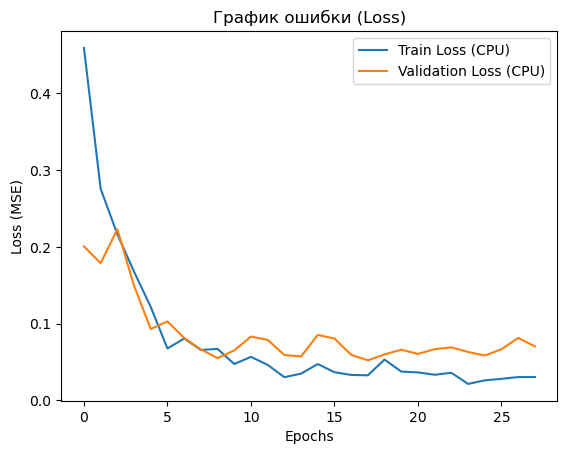

In [139]:
# –ì—Ä–∞—Ñ–∏–∫ –æ—à–∏–±–∫–∏ –¥–ª—è CPU
plt.plot(history.history['loss'], label='Train Loss (CPU)')
plt.plot(history.history['val_loss'], label='Validation Loss (CPU)')

plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('–ì—Ä–∞—Ñ–∏–∫ –æ—à–∏–±–∫–∏ (Loss)')
plt.show()

2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step 


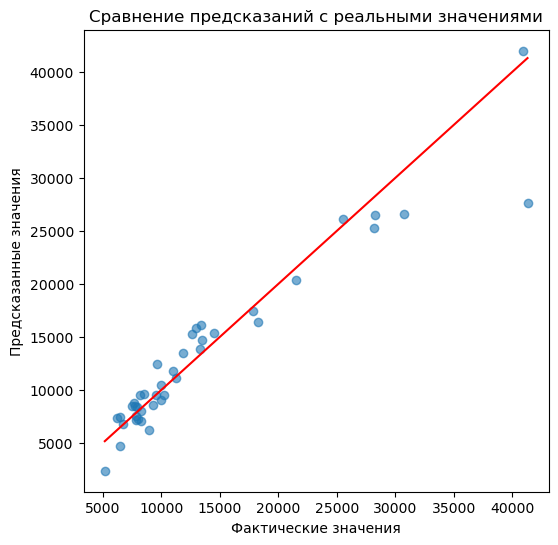

In [141]:
# –ü–æ–ª—É—á–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred_scaled = model_tensor.predict(X_val_scaled)

# –û–±—Ä–∞—Ç–Ω–æ –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –≤ —Ä–µ–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# –ü–æ—Å—Ç—Ä–æ–∏–º scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(y_val, y_pred, alpha=0.6)
plt.xlabel('–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.ylabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π —Å —Ä–µ–∞–ª—å–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏')

# –õ–∏–Ω–∏—è –∏–¥–µ–∞–ª—å–Ω–æ–≥–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')

plt.show()

In [142]:
r2 = r2_score(y_val, y_pred)
print(f"R¬≤ score: {r2:.4f}")


mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)  # –ö–æ—Ä–µ–Ω—å –∏–∑ MSE

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")


y_val_1d = y_val.to_numpy().flatten()  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ 1D-–º–∞—Å—Å–∏–≤
y_pred_1d = y_pred.flatten()  # –£–±–∏—Ä–∞–µ–º –ª–∏—à–Ω—é—é –æ—Å—å, –µ—Å–ª–∏ –µ—Å—Ç—å

mape = np.mean(np.abs((y_val_1d - y_pred_1d) / y_val_1d)) * 100
print(f"MAPE: {mape:.2f}%")

R¬≤ score: 0.9103
MAE: 1582.1248
MSE: 7078138.8972
RMSE: 2660.4772
MAPE: 12.29%


/home/saatarko/.conda/envs/HomeworkDS/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### –í—ã–≤–æ–¥: –ü–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –¥–æ–≤–æ–ª—å–Ω–æ –±–ª–∏–∑–∫–∏–µ –∏ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ –¥–∞–Ω–Ω—ã–µ —Ä–∞—Å–ø–ª–æ–∂–µ–Ω—ã –±–ª–∏–∫–æ –∫ –ª–∏–Ω–∏–∏.
–û–±—â–∏–µ –≤—ã–≤–æ–¥—ã —Ç–∞–∫–∏–µ:

PyTorch (–¥–æ —Å—Ç–µ–∫–∏–Ω–≥–∞): R¬≤ = 0.9239, MAE = 1675.07
–°—Ç–µ–∫–∏–Ω–≥ (–Ω–∞ PyTorch): R¬≤ = 0.9400, MAE = 1449.26
TensorFlow: R¬≤ = 0.9103, MAE = 1582.12

–°—Ç–µ–∫–∏–Ω–≥ —É–ª—É—á—à–∏–ª —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã PyTorch:

R¬≤ —É–≤–µ–ª–∏—á–∏–ª—Å—è —Å 0.9239 –¥–æ 0.9400
MAE —É–º–µ–Ω—å—à–∏–ª—Å—è —Å 1675.07 –¥–æ 1449.26
RMSE —Ç–æ–∂–µ —Å–Ω–∏–∑–∏–ª—Å—è - –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Å—Ç–∞–ª–∏ —Ç–æ—á–Ω–µ–µ
–≠—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç, —á—Ç–æ —Å—Ç–µ–∫–∏–Ω–≥ –ø–æ–º–æ–≥–∞–µ—Ç —É–ª—É—á—à–∏—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è.
TensorFlow –Ω–µ–º–Ω–æ–≥–æ —Ö—É–∂–µ, —á–µ–º PyTorch:

R¬≤ = 0.9103 (—Ö—É–∂–µ, —á–µ–º 0.9239 —É PyTorch)
MAE = 1582.12 (–ª—É—á—à–µ, —á–µ–º 1675 —É PyTorch, –Ω–æ —Ö—É–∂–µ, —á–µ–º 1449 –ø–æ—Å–ª–µ —Å—Ç–µ–∫–∏–Ω–≥–∞)
RMSE –≤—ã—à–µ, —á–µ–º —É —Å—Ç–µ–∫–∏–Ω–≥-–º–æ–¥–µ–ª–∏